In [1]:
# If running in Jupyterlite with Pyodide, install the additional packages
# %pip install pyslammer
# %pip install ipywidgets
# %pip install numpy
# %pip install sympy
# %pip install scipy
# %pip install matplotlib
# %pip install ipympl
%matplotlib widget

In [2]:
# If running on a local machine with the full pyslammer repository, just add the parent directory to the path
import sys
sys.path.append('..')

In [3]:
import pyslammer as slam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

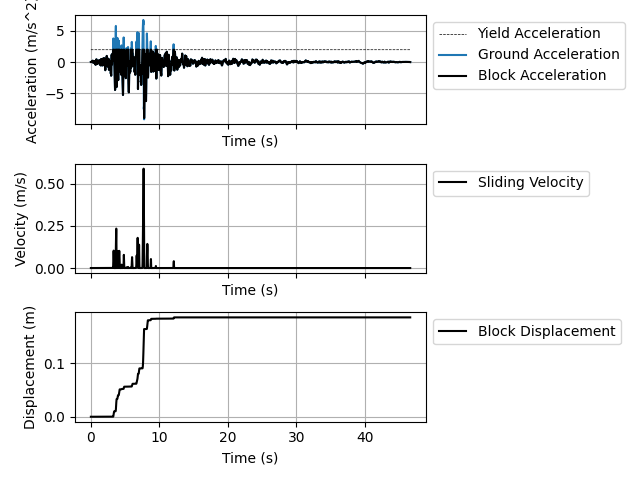

In [4]:
# single simulation
ky = 0.2

tHist = slam.csv_time_hist('../pyslammer/sample_ground_motions/Northridge_VSP-360.csv')
# tHist[1] /= 9.81 (if g is needed)
result = slam.SlidingBlockAnalysis(tHist, ky)
plt.close('all')
fig, axs = slam.sliding_block_plot(result)
plt.show()

In [9]:
kys = np.linspace(0.01,0.7,100)
sgms = slam.sample_ground_motions()
histories = {sgm:slam.csv_time_hist(f'../pyslammer/sample_ground_motions/{sgm}') for sgm in sgms}

output = {}

In [10]:
run = 0
for ky in kys:
    for sgm, hist in histories.items():
        result = slam.SlidingBlockAnalysis(hist, ky)
        output[run] = {"motion":sgm, "ky":ky, "d_max": result.max_sliding_disp, "time":result.time, "disp": result.sliding_disp}
        run += 1

In [62]:
# convert the output to a pandas dataframe
df = pd.DataFrame.from_dict(output,orient='index')
# df = df.reset_index()
# df = df.rename(columns={df.columns[0]: "hist"})
# df

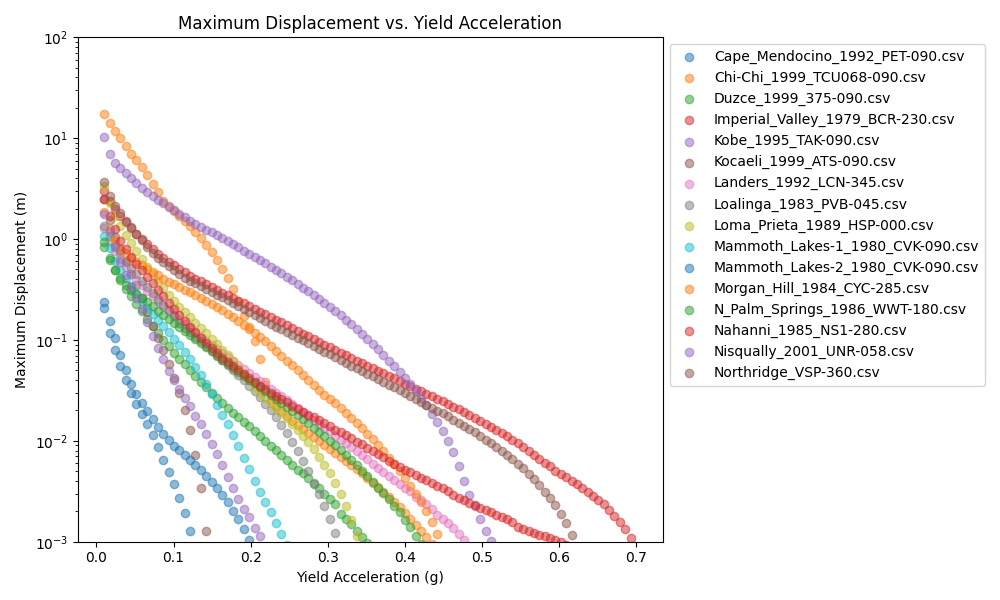

In [75]:
plt.close('all')
fig, ax = plt.subplots()
fig.set_size_inches(10,6)   
for key, grp in df.groupby(['motion']):
    ax.scatter(grp["ky"], grp["d_max"], label=key[0], alpha=0.5)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_yscale('log')
ax.set_ylim(1e-3,1e2)
ax.set_xlabel('Yield Acceleration (g)')
ax.set_ylabel('Maximum Displacement (m)')
ax.set_title('Maximum Displacement vs. Yield Acceleration')

plt.tight_layout()
plt.show()

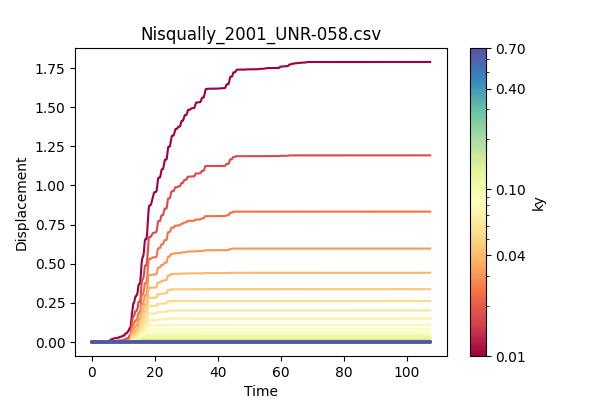

In [72]:
import matplotlib.cm as cm
from matplotlib.colors import LogNorm

plt.close('all')

# Create a figure and axes
fig, ax = plt.subplots(figsize=(6, 4))

# Create a color map
cmap = plt.colormaps['Spectral']#cm.get_cmap('viridis')
norm = LogNorm(df['ky'].min(), df['ky'].max())

motion_index = 1
asdf = df[df["motion"]==sgms[motion_index]]

# Iterate over the rows of the DataFrame
for index, row in asdf.iterrows():
    color = cmap(norm(row['ky']))
    ax.plot(row['time'], row['disp'], color=color)
    
# ax.set_yscale('log')
# ax.set_ylim([0.001,10])

# Add a color bar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
# Add a color bar
cbar = fig.colorbar(sm, ax=ax, label='ky')

# Set the colorbar ticks and labels
ticks = [0.01, 0.04, 0.1, 0.4, 0.7]#np.linspace(df['ky'].min(), df['ky'].max(), num=5)  # Adjust num for more or fewer ticks
cbar.set_ticks(ticks)
cbar.set_ticklabels([f'{tick:.2f}' for tick in ticks])  # Adjust the format as needed

# ax.set_yscale('log')
# ax.set_ylim(1e-3,1e2)
ax.set_xlabel('Time')
ax.set_ylabel('Displacement')
ax.set_title(f'{sgms[motion_index]}')
plt.show()